In [31]:
from __future__ import unicode_literals
import re
import pandas as pd
from hazm import *
from nltk import FreqDist
import pandas as pd
import re
import csv

In [32]:
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()
tagger = POSTagger(model='./resources/postagger.model')
parser = DependencyParser(tagger=tagger, lemmatizer=lemmatizer)
chunker = Chunker(model='resources/chunker.model')

In [33]:
def get_analysis(token, mode = 0):
    assert 0 <= mode < 5 ,"0  <= mode < 5"
    if mode == 0:
        return lemmatizer.lemmatize(token)
    if mode == 1:
        return stemmer.stem(token)
    if mode == 2:
        return normalizer.normalize(token)
    if mode == 3:
        return sent_tokenize(token)
    if mode == 4:
        return word_tokenize(token)

def ste_lem(sentence , mode = 0):
    assert 0 <= mode <= 1 ,"mode 1 or 0"
    return [get_analysis(s,1-mode) for s in sentence]

def find_NP(chunked_tree):
    res = re.findall("\[[^\[]* NP\]", chunked_tree)
    return [" ".join([get_analysis(w) for w in word[1:-4].strip().replace("\u200c", " ").split()]).strip() for word in res]

def find_VP(chunked_tree):
    res = re.findall("\[[^\[]* VP\]", chunked_tree)
    return [" ".join([get_analysis(w) for w in word[1:-4].strip().replace("\u200c", " ").split()]).strip() for word in res]

In [45]:
comments = []
regex = "\u200c"
comments_csv = pd.read_csv("SnappFood Comments Dataset.csv")["comments"]
for comment in comments_csv:
    comments.append(comment)
    
foods = []
foods_csv = pd.read_csv("foods.csv")["foods"]
for food in foods_csv:
    foods.append(re.sub(regex," ",food))
    
drinks = []
drinks_csv = pd.read_csv("drinks.csv")["drinks"]
for drink in drinks_csv:
    drinks.append(re.sub(regex," ",drink))

In [36]:
number_of_each_word = {}
for comment in comments:
    tokenize_sentence = get_analysis(comment,4)
    chunked = chunker.parse(tagger.tag(tokenize_sentence))
    tree = tree2brackets(chunked)
    NP_W = find_NP(tree)
    for NP in NP_W:
        if NP not in number_of_each_word:
            number_of_each_word[NP] = 1
        else:
            number_of_each_word[NP] += 1
print(number_of_each_word)

{'مالیاتتون': 16, 'rozita farahbakhsh عزیز': 16, 'همراه شما': 1640, 'براساس مصوبه ی سازمان امور مالیات کشور': 160, 'رستوران ها': 128, 'غذا و خدمات ارائه شده': 136, 'مشتری': 164, 'سیب زمین': 272, 'ما': 1492, 'غذا': 764, 'نسبت سرد': 16, 'انتظار': 48, 'برگر لند': 16, 'مرغ سوخاری': 72, 'کیفیت': 640, 'پیتزا': 480, 'کیفیت و بد مزه': 16, 'چیز': 88, 'سس سیب زمین': 16, 'مهرداد زماني عزیز': 16, 'نظر': 740, 'میان': 712, 'ذکرشده': 608, 'کیفیت و طعم لازانیا': 16, 'برگر': 96, 'سس': 160, 'مجموع': 32, 'قبل': 128, 'همیشه': 228, 'گوشت بیف': 16, 'دوتا': 32, 'پیتزا انقدر تو': 16, 'فر': 16, 'اميرحسين زنده دل عزیز': 16, 'بروز چنین مشکل': 164, 'عذرخواهی': 420, 'تمام تلاش خود': 128, 'ارائه خدمات مطلوب و شایسته شما': 152, 'سپاس': 712, 'نان سیری': 16, 'داخل سیر': 16, 'یادشون': 16, 'سیر': 24, 'عرض پوزش ازشما': 64, 'مجموعه': 136, 'نوشین': 16, 'قلی زاده عزیز': 16, 'سوخاری خوشمزه': 16, 'نون': 112, 'سس خیس': 16, 'این نمیشه': 16, 'پرپروک': 40, 'نقص': 28, 'کیفیت اما این سری': 16, 'یکم': 40, 'هات داگ': 32, 'قارچ و پنیر

In [37]:
final_foods = {}
for word in number_of_each_word:
    if word in foods:
        final_foods[word] = number_of_each_word[word]
print(final_foods)

{'مرغ سوخاری': 72, 'پیتزا': 480, 'برگر': 96, 'سس': 160, 'هات داگ': 32, 'آش': 20, 'همبرگر': 56, 'پیتزا گوشت و قارچ': 8, 'روغن': 56, 'ماست': 16, 'ترشی': 8, 'نان سنگک': 20, 'نان لواش': 8, 'آبگوشت': 40, 'دیزی': 48, 'دوغ': 16, 'فیله سوخاری': 24, 'سالاد سزار': 80, 'بال سوخاری': 16, 'چیز برگر': 8, 'سس مخصوص': 16, 'ساندویچ': 88, 'نان': 92, 'بشقاب': 8, 'نوشیدنی': 16, 'ماکارونی': 8, 'پیتزا دونر استیک': 8, 'نان سیر': 56, 'پیتزا پپرونی': 16, 'سالاد': 216, 'سس سزار': 16, 'سس پنیر': 16, 'سالاد کلم': 40, 'پیده': 24, 'پیاز سوخاری': 8, 'پیاز': 80, 'پیتزا مارگاریتا': 8, 'کره': 16, 'آش شله قلمکار': 16, 'حلیم': 28, 'اش رشته': 16, 'آش رشته': 32, 'استرامبولی': 16, 'آش دوغ': 16, 'سس کچاپ': 8, 'اضافات': 8, 'املت': 8, 'سوخاری': 8, 'سس اضافه': 8, 'نوشابه': 8, 'زیتون': 8, 'لازانیا': 8, 'سس تند': 8, 'پیتزا مرغ': 8, 'پیتزا سبزیجات': 8, 'سس سیر': 8, 'چیزبرگر': 8, 'نان اضافه': 4, 'مغز': 8, 'شیردان': 8, 'دوغ خانواده': 4, 'ماست موسیر': 4, 'کله پاچه': 4, 'لیمو': 12, 'باقالی پلو': 4, 'پاچه': 4, 'زبان': 8, 'چشم': 4, 'بنا

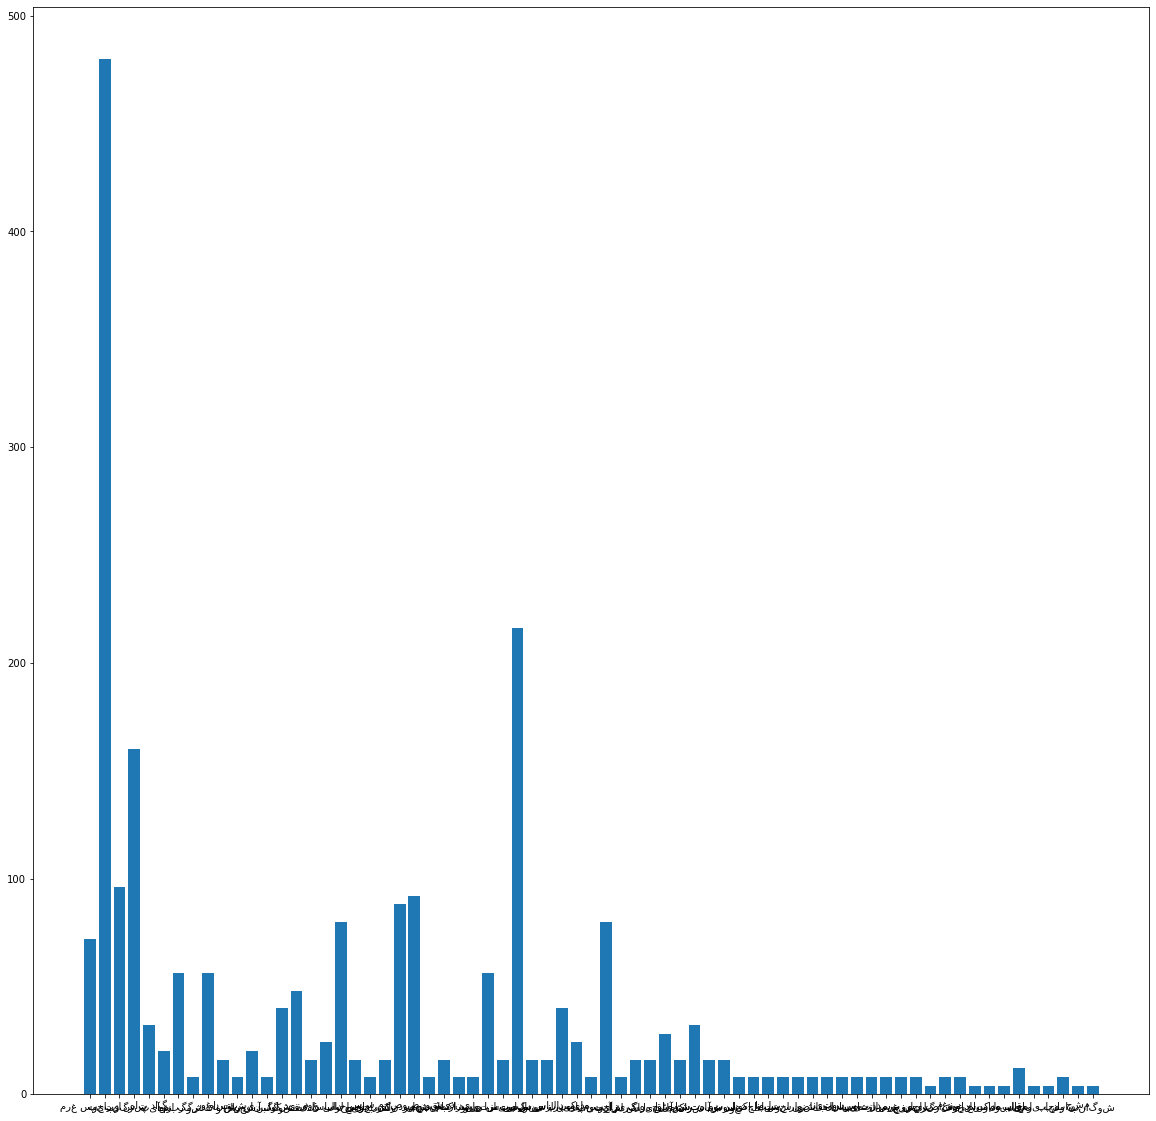

In [38]:
import matplotlib.pyplot as plt

names = list(final_foods.keys())
values = list(final_foods.values())
plt.figure(figsize=(20, 20))
plt.bar(range(len(final_foods)), values, tick_label=names)
plt.show()

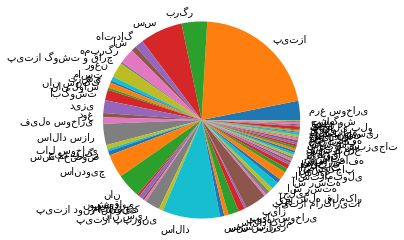

In [39]:
import matplotlib.pyplot as plt

labels = []
sizes = []

for x, y in final_foods.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

In [47]:
final_drinks = {}
for word in number_of_each_word:
    if word in drinks:
        final_drinks[word] = number_of_each_word[word]
print(final_drinks)

{'دوغ': 16, 'نوشیدنی': 16, 'نوشابه': 8}


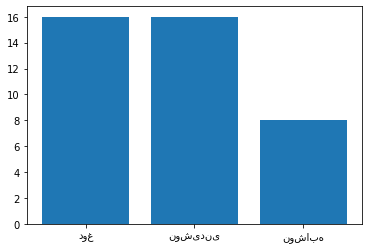

In [50]:
import matplotlib.pyplot as plt

names = list(final_drinks.keys())
values = list(final_drinks.values())
plt.bar(range(len(final_drinks)), values, tick_label=names)
plt.show()

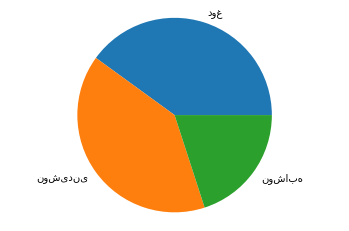

In [51]:
import matplotlib.pyplot as plt

labels = []
sizes = []

for x, y in final_drinks.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()